<a href="https://colab.research.google.com/github/LuizHVicari/Sistemas-Inteligentes/blob/main/RedesNeurais/Regressor_Log%C3%ADstico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# a função de perda possui um erro de sinal, como pode ser visto em:
# L = -Σ[y(i)log(σ(z(i))) + (1-y(i))log(1-σ(z(i)))]
# está escrito como:
# L = Σ[-y(i)log(σ(z(i))) + (1-y(i))log(1-σ(z(i)))]
# porém o correto seria:
# L = Σ[-y(i)log(σ(z(i))) - (1-y(i))log(1-σ(z(i)))]

sigma = lambda z : 1 / (1 + np.exp(-z))
loss = lambda z, y: -y * np.log(sigma(z)) - (1-y) * np.log(1-sigma(z))

d_sigma = lambda z : sigma(z) * (1- sigma(z))

def calcula_epoca(matriz, pesos, taxa_aprendizado = 0.5):
    erro_epoca = 0
    loss_epoca = 0
    previsao = list()

    for i, linha in enumerate(matriz):
        z = linha[0] * pesos[0] + linha[1] * pesos[1] + linha[2] * pesos[2]
        a = sigma(z)
        pyx = np.power(a, linha[3])*np.power((1-a), (1-linha[3]))

        previsao.append(0 if a < 0.5 else 1)

        Lw = loss(a, linha[3])
        dLdwj = [(a-linha[3]) * valor for valor in linha[0:3]]
        pesos = [ peso - taxa_aprendizado * delta_w  for peso, delta_w in zip(pesos, dLdwj)]
        loss_epoca += Lw

    return pesos, loss_epoca, np.array(previsao)

mat = np.array([
    [1, 0, 1, 0],
    [1, 2, 0, 0],
    [1, 1, 1, 1],
    [1, 2, 1, 1]]
)

y = mat[:, 3]

pesos = [-1.5, 0, 2]
i = 1

for i in range(4):
    print(f'Epoca {i + 1}')

    pesos, loss_epoca, previsao = calcula_epoca(mat, pesos)
    taxa_acertos = sum(previsao == y) / previsao.shape[0]

    print(f'Loss da época: {loss_epoca}')
    print(f'Pesos atualizados: {pesos}')
    print(f'Previsão: {previsao}')
    print(f'Taxa de acertos: {taxa_acertos}')
    print()
    i += 1

Epoca 1
Loss da época: 2.738449740290955
Pesos atualizados: [-1.4233442770642613, 0.4845026529372187, 2.1469005105299637]
Previsão: [1 0 0 1]
Taxa de acertos: 0.5

Epoca 2
Loss da época: 2.7951622026344305
Pesos atualizados: [-1.5591431625741108, 0.6446350703395544, 2.1670749936335376]
Previsão: [1 0 1 1]
Taxa de acertos: 0.75

Epoca 3
Loss da época: 2.79679728768021
Pesos atualizados: [-1.7146686255085988, 0.7399725718824439, 2.189453312563489]
Previsão: [1 0 1 1]
Taxa de acertos: 0.75

Epoca 4
Loss da época: 2.782143836620092
Pesos atualizados: [-1.8633203412847554, 0.81505867954321, 2.224548763294624]
Previsão: [1 0 1 1]
Taxa de acertos: 0.75



In [ ]:
import pandas as pd

df = pd.DataFrame()
df['x0'] = [1, 1, 1, 1]
df['x1'] = [0, 2, 1, 2]
df['x2'] = [1, 0, 1, 1]
df['y'] = [0, 0, 1, 1]

df

,x0,x1,x2,y
0,1,0,1,0
1,1,2,0,0
2,1,1,1,1
3,1,2,1,1


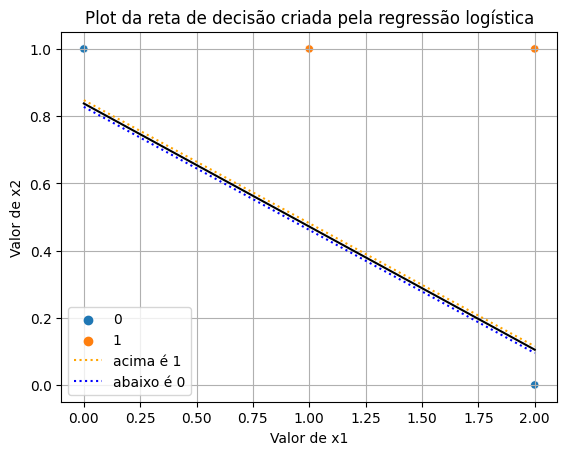

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

y = lambda x : (-pesos[1] * x - pesos[0]) / pesos[2]

sns.scatterplot(data=df, x='x1', y='x2', hue=df['y'])
plt.plot([0, 2], [y(0), y(2)], color='black')
plt.plot([0, 2], [y(0) + 0.01, y(2) + 0.01], color='orange', linestyle='dotted', label='acima é 1')
plt.plot([0, 2], [y(0) - 0.01, y(2) - 0.01], color='blue',  linestyle='dotted', label='abaixo é 0')
plt.grid()
plt.title("Plot da reta de decisão criada pela regressão logística")
plt.xlabel("Valor de x1")
plt.ylabel("Valor de x2")
plt.legend()
plt.show()

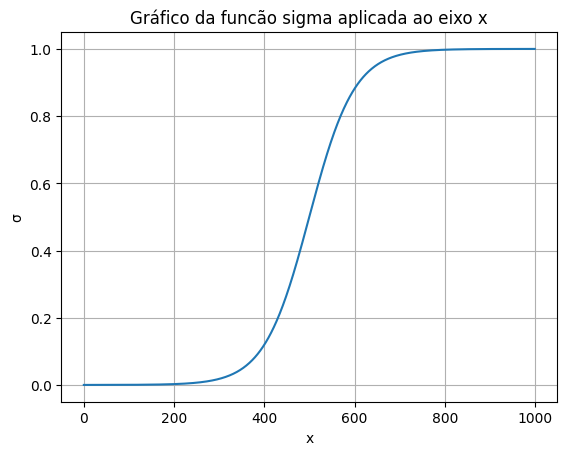

In [ ]:
saida = np.linspace(-10, 10, 1000)
plt.plot(sigma(saida))
plt.title("Gráfico da funcão sigma aplicada ao eixo x")
plt.xlabel("x")
plt.ylabel("σ")
plt.grid("on")
plt.show()

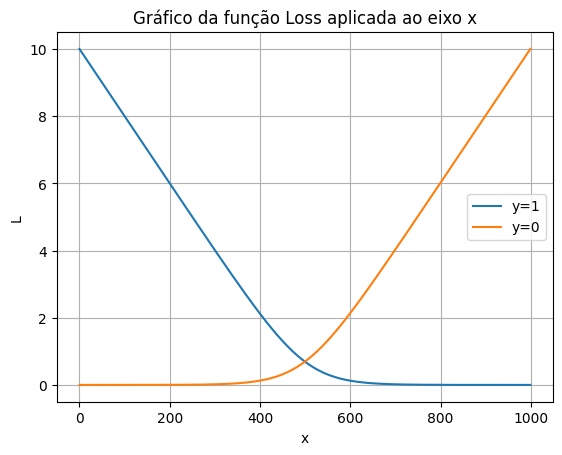

In [ ]:
plt.plot(loss(saida, 1), label="y=1")
plt.plot(loss(saida, 0), label="y=0")
plt.title("Gráfico da função Loss aplicada ao eixo x")
plt.xlabel("x")
plt.ylabel("L")
plt.grid('on')
plt.legend()
plt.show()